## Import Libraries

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import random

## Load the Dataset

In [3]:
dataset = pd.read_csv("name.csv",encoding='latin1')

In [4]:
dataset.head()

,Name,Target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Yash,1,NaN,NaN,NaN,NaN
1,Prit,1,NaN,NaN,NaN,NaN
2,Meet,1,NaN,NaN,NaN,NaN
3,Drashti,0,NaN,NaN,NaN,NaN
4,Saloni,0,NaN,NaN,NaN,NaN


## Pre-processing data

In [5]:
# Lowercasing names
dataset['Name'] = dataset['Name'].str.lower()

In [6]:
# Removing punctuation
dataset['Name'] = dataset['Name'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [7]:
dataset.head()

,Name,Target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,yash,1,NaN,NaN,NaN,NaN
1,prit,1,NaN,NaN,NaN,NaN
2,meet,1,NaN,NaN,NaN,NaN
3,drashti,0,NaN,NaN,NaN,NaN
4,saloni,0,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [8]:
print(dataset.shape)

(1299, 6)


In [9]:
# Check for missing values
print(dataset.isnull().sum())

Name             0
Target           0
Unnamed: 2    1299
Unnamed: 3    1299
Unnamed: 4    1299
Unnamed: 5    1299
dtype: int64


In [10]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],inplace=True)


In [11]:
print(dataset.columns)

print(dataset.dtypes)

Index(['Name', 'Target'], dtype='object')
Name      object
Target     int64
dtype: object


In [12]:
dataset.head()

,Name,Target
0,yash,1
1,prit,1
2,meet,1
3,drashti,0
4,saloni,0


## Data Augmentation

In [13]:
def transpose_letters(name):
    name_list = list(name)
    random.shuffle(name_list)
    return ''.join(name_list)

def change_case(name):
    return name.lower() if random.random() < 0.5 else name.upper()


In [14]:
augmented_data = []

for index, row in dataset.iterrows():
    name, gender = row['Name'], row['Target']
    for _ in range(5):  # Generate 5 augmented samples for each original name
        augmented_name = random.choice([transpose_letters(name), change_case(name)])
        augmented_data.append({'Name': augmented_name, 'Target': gender})


In [15]:
augmented_df = pd.DataFrame(augmented_data)

In [16]:
df = pd.concat([dataset, augmented_df], ignore_index=True)


In [17]:
df.to_csv('augmented_dataset.csv', index=False)


In [18]:
df.head()

,Name,Target
0,yash,1
1,prit,1
2,meet,1
3,drashti,0
4,saloni,0


In [19]:
df['Target'] = df['Target'].replace({0:"F",1:"M"})

In [20]:
print(df.shape)

(7794, 2)


In [21]:
print(len(df['Name'].unique()))

5229


Text(0.5, 1.0, 'No. of male and female names in the dataset')

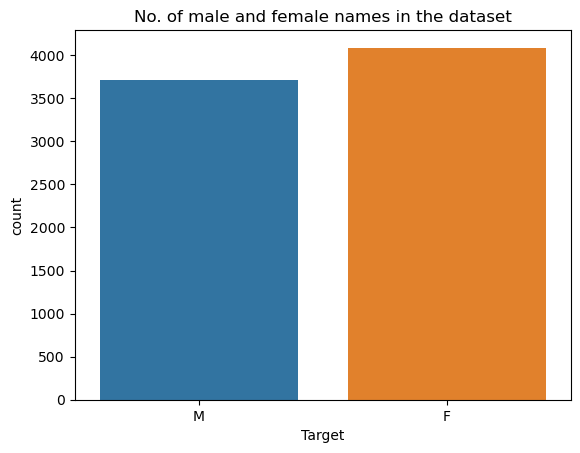

In [22]:
sns.countplot(x='Target',data = df)
plt.title('No. of male and female names in the dataset')


In [23]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(df[df['Name'].str.startswith(i)])

print(startletter_count)

{'A': 162, 'B': 64, 'C': 33, 'D': 96, 'E': 8, 'F': 17, 'G': 44, 'H': 75, 'I': 33, 'J': 66, 'K': 103, 'L': 18, 'M': 120, 'N': 114, 'O': 5, 'P': 96, 'Q': 0, 'R': 139, 'S': 261, 'T': 56, 'U': 20, 'V': 98, 'W': 0, 'X': 0, 'Y': 18, 'Z': 16}


Text(0.5, 1.0, 'Number of names starting with each letter')

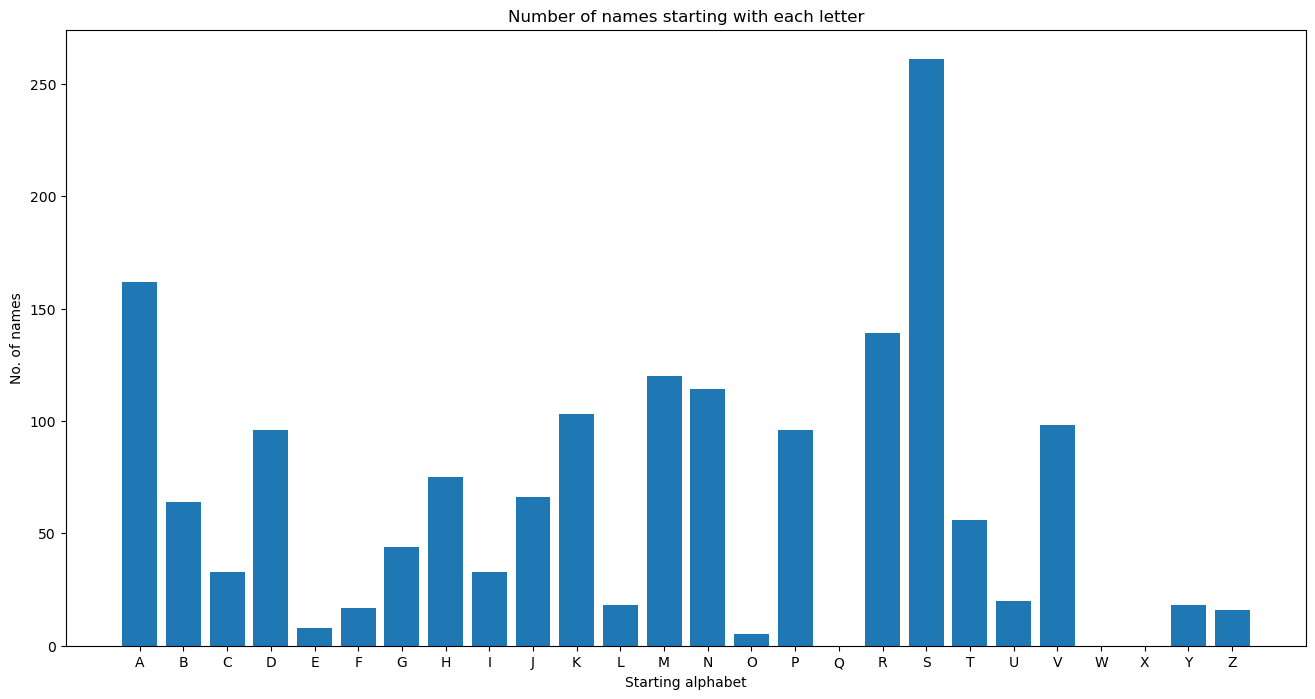

In [24]:
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Starting alphabet')

plt.ylabel('No. of names')

plt.title('Number of names starting with each letter')

In [25]:
print('The 5 most name starting letters are : ',

       *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name starting letters are :  ('S', 261) ('A', 162) ('R', 139) ('M', 120) ('N', 114)


In [26]:
small_alphabets = ['a','b','c','d','e','f','g','h',

                   'i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']

endletter_count ={}

for i in small_alphabets:

    endletter_count[i]=len(df[df['Name'].str.endswith(i)])

print(endletter_count)

{'a': 1428, 'b': 69, 'c': 9, 'd': 128, 'e': 174, 'f': 19, 'g': 63, 'h': 471, 'i': 901, 'j': 117, 'k': 187, 'l': 340, 'm': 197, 'n': 475, 'o': 76, 'p': 101, 'q': 4, 'r': 367, 's': 236, 't': 280, 'u': 183, 'v': 127, 'x': 8, 'y': 144, 'z': 8}


Text(0.5, 1.0, 'Number of names ending with each letter')

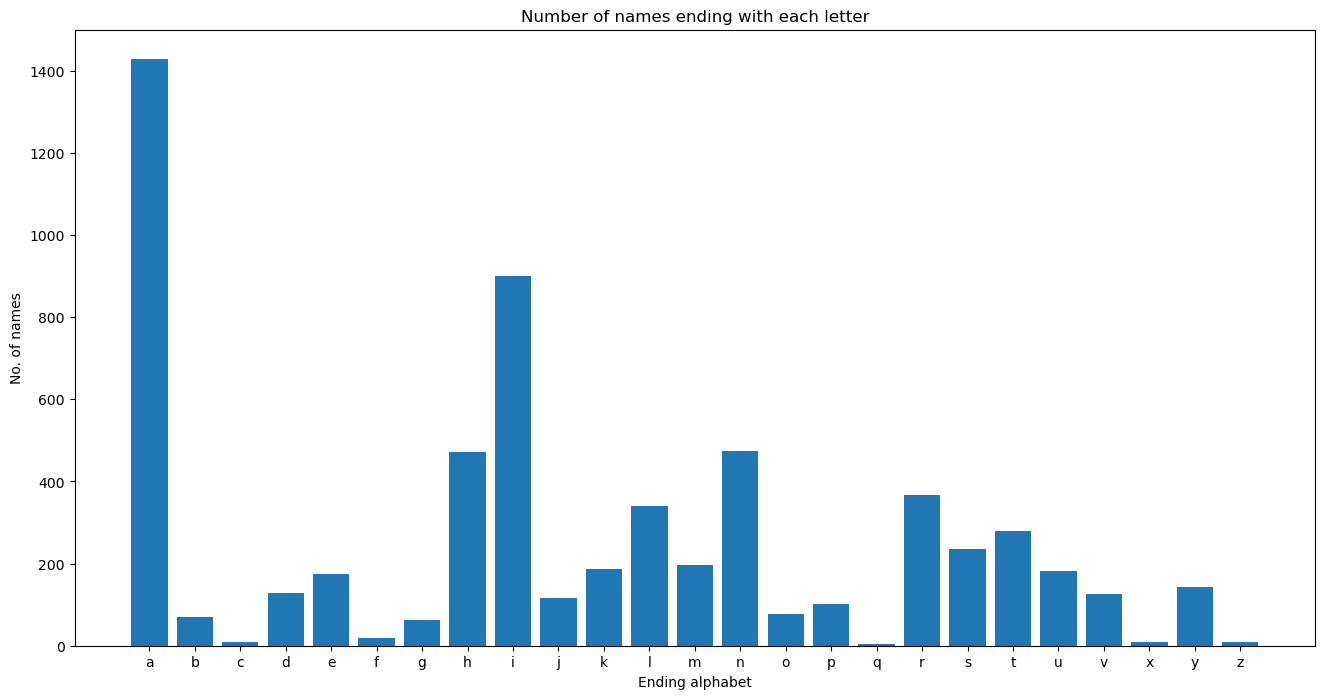

In [27]:
plt.figure(figsize = (16,8))

plt.bar(endletter_count.keys(),endletter_count.values())

plt.xlabel('Ending alphabet')

plt.ylabel('No. of names')

plt.title('Number of names ending with each letter')

In [28]:
print('The 5 most name endind letters are : ', *sorted(endletter_count.items(),

        key=lambda item: item[1])[-5:][::-1])

The 5 most name endind letters are :  ('a', 1428) ('i', 901) ('n', 475) ('h', 471) ('r', 367)


## Building the Models

In [29]:
X =list( df['Name'])

Y = list(df['Target'])

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

Y = encoder.fit_transform(Y)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer 

cv=CountVectorizer(analyzer='char')

X=cv.fit_transform(X).toarray()

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()

LR_model.fit(x_train,y_train)

LR_y_pred = LR_model.predict(x_test)

## Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB

NB_model= MultinomialNB()

NB_model.fit(x_train,y_train)

NB_y_pred = NB_model.predict(x_test)

## XGBoost

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier

XGB_model = XGBClassifier(use_label_encoder= False)

XGB_model.fit(x_train,y_train)

XGB_y_pred = XGB_model.predict(x_test)

## Comparison of Performance

In [36]:
# function for confusion matrix

from sklearn.metrics import confusion_matrix

def cmatrix(model):

    y_pred = model.predict(x_test)

    cmatrix = confusion_matrix(y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')

For logistic regression

0.6902448503692188
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1305
           1       0.70      0.64      0.67      1268

    accuracy                           0.69      2573
   macro avg       0.69      0.69      0.69      2573
weighted avg       0.69      0.69      0.69      2573

[[964 341]
 [456 812]]
None


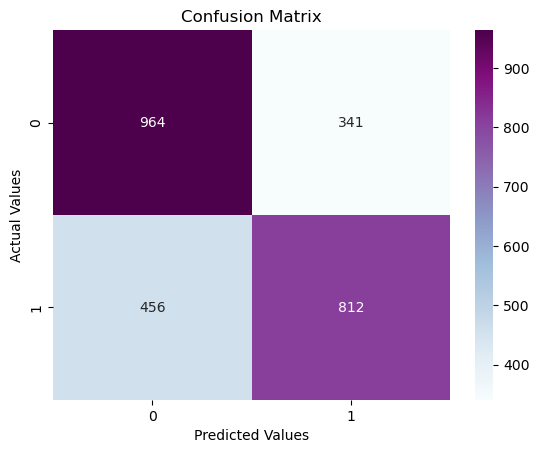

In [37]:
import sklearn.metrics as metrics



print(metrics.accuracy_score(LR_y_pred,y_test))

print(metrics.classification_report(y_test, LR_y_pred))

print(cmatrix(LR_model))

For naive bayes

0.5930820054411193
              precision    recall  f1-score   support

           0       0.58      0.70      0.64      1305
           1       0.61      0.48      0.54      1268

    accuracy                           0.59      2573
   macro avg       0.60      0.59      0.59      2573
weighted avg       0.60      0.59      0.59      2573

[[912 393]
 [654 614]]
None


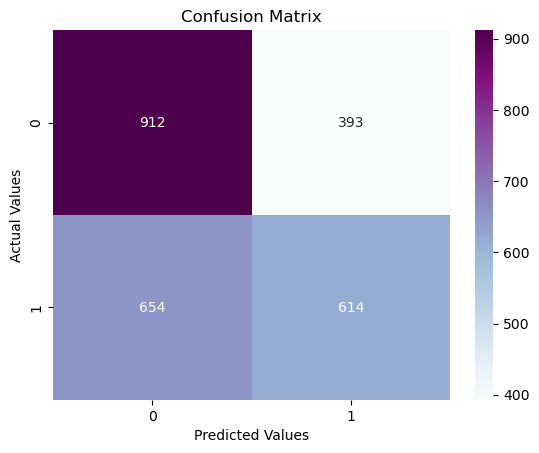

In [38]:


print(metrics.accuracy_score(NB_y_pred,y_test))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))

For XGBoost

0.9385930820054411
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1305
           1       0.95      0.92      0.94      1268

    accuracy                           0.94      2573
   macro avg       0.94      0.94      0.94      2573
weighted avg       0.94      0.94      0.94      2573

[[1248   57]
 [ 101 1167]]
None


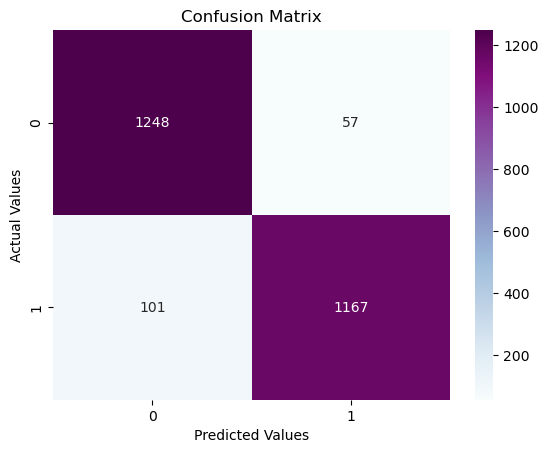

In [39]:

print(metrics.accuracy_score(XGB_y_pred,y_test))

print(metrics.classification_report(y_test, XGB_y_pred))

print(cmatrix(XGB_model))

## LSTM


In [40]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer

In [41]:
max_words = 1000

max_len = 26
vocab_size = 10000
embedding_dim = 40
input_sequence_length = 28

# Create an LSTM model
LSTM_model = Sequential()

# Add an Embedding layer
LSTM_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_sequence_length))
LSTM_model.add(Dropout(0.3))

LSTM_model.add(LSTM(100))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(64,activation='relu'))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(1,activation='sigmoid'))

LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(LSTM_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 40)            400000    
                                                                 
 dropout (Dropout)           (None, 28, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [42]:
LSTM_model.fit(x_train,y_train,epochs=100,batch_size=40)


Epoch 1/100
131/131 [==============================] - 12s 48ms/step - loss: 0.6919 - accuracy: 0.5194
Epoch 2/100
131/131 [==============================] - 6s 47ms/step - loss: 0.6909 - accuracy: 0.5325
Epoch 3/100
131/131 [==============================] - 6s 48ms/step - loss: 0.6890 - accuracy: 0.5328
Epoch 4/100
131/131 [==============================] - 6s 48ms/step - loss: 0.6873 - accuracy: 0.5371
Epoch 5/100
131/131 [==============================] - 6s 48ms/step - loss: 0.6844 - accuracy: 0.5558
Epoch 6/100
131/131 [==============================] - 7s 50ms/step - loss: 0.6855 - accuracy: 0.5495
Epoch 7/100
131/131 [==============================] - 6s 48ms/step - loss: 0.6831 - accuracy: 0.5554
Epoch 8/100
131/131 [==============================] - 6s 49ms/step - loss: 0.6823 - accuracy: 0.5600
Epoch 9/100
131/131 [==============================] - 6s 47ms/step - loss: 0.6804 - accuracy: 0.5610
Epoch 10/100
131/131 [==============================] - 6s 47ms/step - loss: 0.67

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [46]:
def predict_gender(name):
    name_samplevector = cv.transform([name]).toarray()
    prediction = LSTM_model.predict(name_samplevector)
    
    if prediction >= 0.5:
        return 'Male'
    else:
        return 'Female'

name_to_predict= 'samisksha'
predicted_gender = predict_gender(name_to_predict)
print(f"Predicted gender for {name_to_predict}: {predicted_gender}")

1/1 [==============================] - 0s 271ms/step
Predicted gender for samisksha: Female


## CNN

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten

In [48]:
# Label encoding
label_encoder = LabelEncoder()
dataset['Target'] = label_encoder.fit_transform(dataset['Target'])

# Tokenization and padding
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(dataset['Name'])
sequences = tokenizer.texts_to_sequences(dataset['Name'])
padded_sequences = pad_sequences(sequences)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, dataset['Target'], test_size=0.2, random_state=42)

# Build the CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50
input_length = padded_sequences.shape[1]

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16, 50)            1450      
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           32128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [49]:
def predict_gender(name):
    name_sequence = tokenizer.texts_to_sequences([name])
    padded_sequence = pad_sequences(name_sequence, maxlen=input_length)
    prediction = model.predict(padded_sequence)[0][0]
    
    if prediction >= 0.5:
        return 'Male'
    else:
        return 'Female'

# Example usage
name_to_predict = "rakesh"
predicted_gender = predict_gender(name_to_predict)
print(f"Predicted gender for {name_to_predict}: {predicted_gender}")

1/1 [==============================] - 0s 64ms/step
Predicted gender for rakesh: Male
